In [3]:
#imports Pustaka
import cv2
from matplotlib import pyplot as plt
import numpy as np


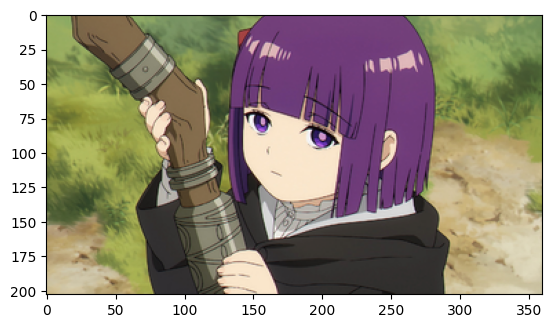

In [4]:
file = "fern.png"
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [5]:

#Konevrsi citra warna menjadi abu bau
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(
gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 5)

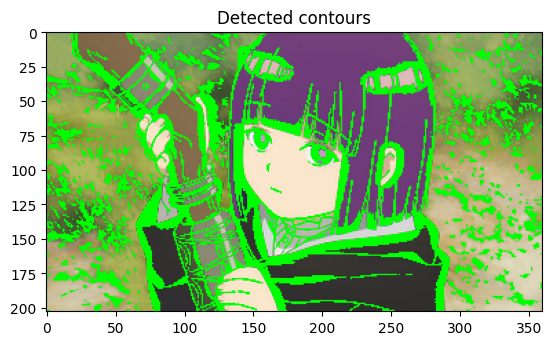

In [6]:
#Fungsi untuk menemukan kontur
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
detected_contours = img.copy()
cv2.drawContours(detected_contours, contours, -1, (0, 255, 0), -1)
plt.imshow(detected_contours)
plt.title('Detected contours')
plt.show()

In [7]:
contours, _ = cv2.findContours(
thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


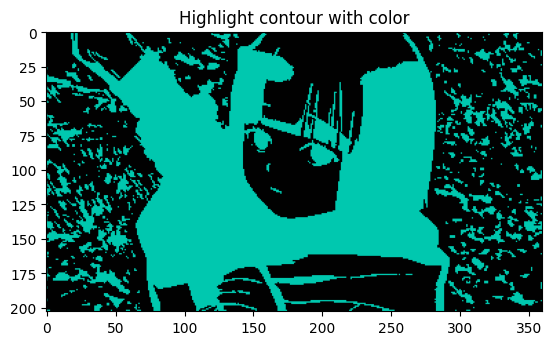

In [8]:
#masking gambar
highlight = np.ones_like(img)
cv2.drawContours(highlight, contours, -1, (0, 200, 175), cv2.FILLED)
plt.imshow(highlight)
plt.title('Highlight contour with color')
plt.show()

In [9]:
#Penyamaran Kembali atau ulang
mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)
foreground = cv2.bitwise_and(img, mask)


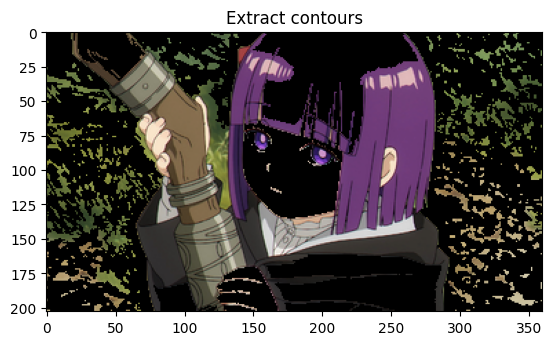

In [10]:
#tepi
plt.imshow(foreground)
plt.title('Extract contours')
plt.show()


In [11]:
print("\t")

In [12]:
#--main-plot--
contours = {"Original": img, "Detected contours": detected_contours,
"Color contours": highlight, "Extract contours": foreground}
plt.subplots_adjust(wspace=.2, hspace=.2)
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

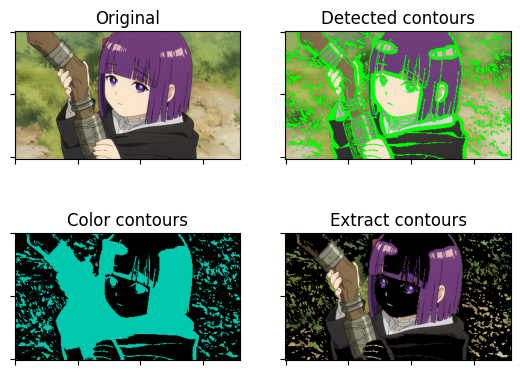

In [13]:
import matplotlib.pyplot as plt

for i, (key, value) in enumerate(contours.items()):
    plt.subplot(2, 2, i + 1)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.title("{}".format(key))
    plt.imshow(value)

plt.show()  # Make sure to display the plots
